<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Supervised%20Learning/9.1%20Ensemble%20Method%20-%20Bagging/Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 1: Load the Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["Age", "Workclass", "Fnlwgt", "Education", "Education-Num", "Marital Status",
           "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
           "Hours/Week", "Country", "Income"]

data = pd.read_csv(url, names=columns, skipinitialspace=True)

print("Dataset Shape:", data.shape)
print(data.head())





Dataset Shape: (32561, 15)
   Age         Workclass  Fnlwgt  Education  Education-Num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       Marital Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital Gain  Capital Loss  Hours/Week        Country Income  
0          2174             0          40  United-States  <=50K  
1             0        

In [3]:
# Step 2: Data Preprocessing
# Handle missing values
data = data.replace('?', np.nan)
data = data.dropna()

# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Split features and target
X = data.drop("Income", axis=1)
y = data["Income"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 3: Train the Bagging Classifier
print("Training Bagging Classifier...")
base_model = DecisionTreeClassifier(max_depth=10, random_state=42)
bagging_clf = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
print("Training Complete!")

Training Bagging Classifier...
Training Complete!


In [5]:
# Step 4: Model Evaluation
y_pred = bagging_clf.predict(X_test)


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.86
Confusion Matrix:
 [[4262  241]
 [ 600  930]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4503
           1       0.79      0.61      0.69      1530

    accuracy                           0.86      6033
   macro avg       0.84      0.78      0.80      6033
weighted avg       0.86      0.86      0.85      6033



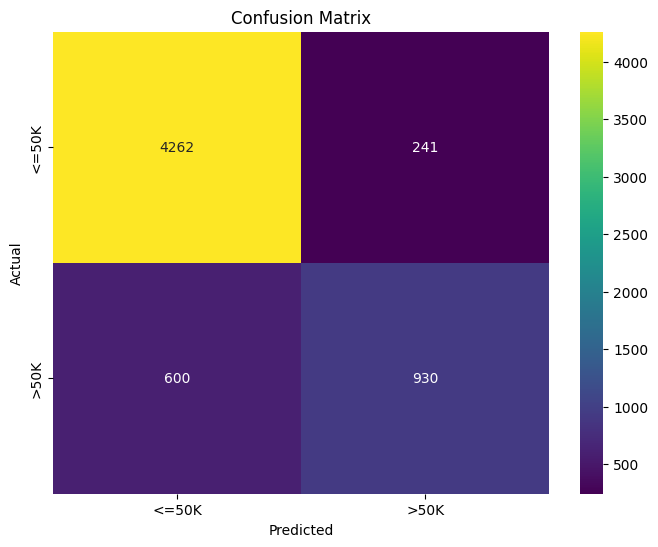

In [6]:
# Step 5: Visualize Results
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
importances = bagging_clf.estimators_[0].feature_importances_
feature_names = X.columns

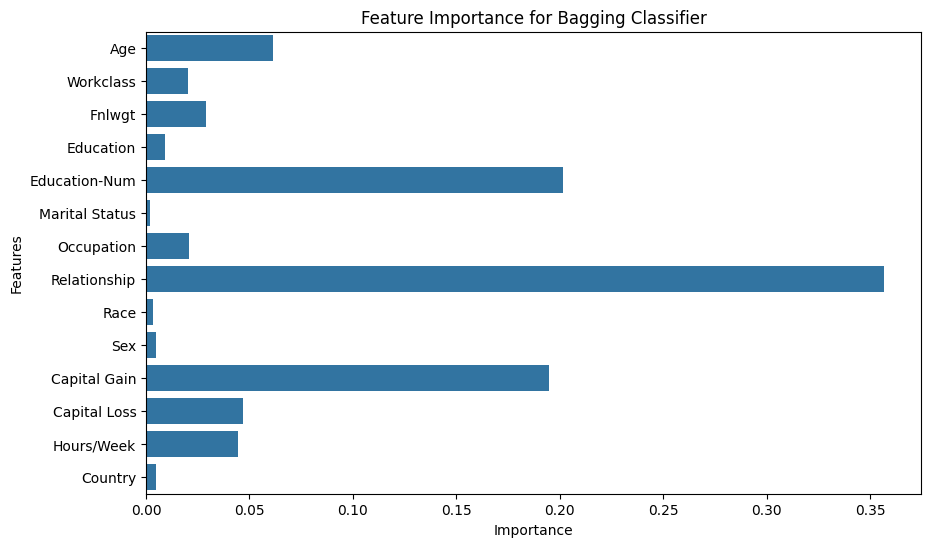

In [7]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Bagging Classifier")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()